In [95]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import re

In [96]:
#definindo os diretórios

main_dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images'
pleasant_dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant'
pleasant_p1dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+1'
pleasant_p2dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+2'
pleasant_p3dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+3'
pleasant_p4dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+4'
pleasant_p5dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+5'
pleasant_n1dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-1'
pleasant_n2dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-2'
pleasant_n3dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-3'
pleasant_n4dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-4'
pleasant_n5dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-5'

In [97]:
def complexity_ratio(img_path, compressed_img_path):
    
    image = Image.open(img_path)
    
    image.save(compressed_img_path, optimize=True, quality=95)
    
    compressed_size = os.path.getsize(compressed_img_path)

    return (round((compressed_size/(512*512*3))*100, 2))

In [98]:
images_path = []
images_weight = []
images_comp_ratio = []
images_seed = []

def import_images(directory):
    
    compressed_dir = os.path.join(main_dir, 'compressed')
    if not os.path.exists(compressed_dir):
        os.makedirs(compressed_dir)
    
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                img_path = os.path.join(root, file)

                compressed_img_path = os.path.join(compressed_dir, f"compressed_{file}")
                
                comp_ratio = complexity_ratio(img_path, compressed_img_path)
                images_comp_ratio.append(comp_ratio)
                
                images_path.append(img_path)

                match_seed = re.search(r'S(\d+)', file)
                match_p = re.search(r'Pleasant\+(\d+)', directory)
                match_n = re.search(r'Pleasant-(\d+)', directory)


                if match_p:
                    images_weight.append(int(match_p.group(1)))       
                elif match_n:
                    images_weight.append(int(match_n.group(1)) * -1)                  
                else:
                    images_weight.append(0)

                images_seed.append(int(match_seed.group(1)))

import_images(pleasant_dir)
import_images(pleasant_p1dir)
import_images(pleasant_p2dir)
import_images(pleasant_p3dir)
import_images(pleasant_p4dir)
import_images(pleasant_p5dir)
import_images(pleasant_n1dir)
import_images(pleasant_n2dir)
import_images(pleasant_n3dir)
import_images(pleasant_n4dir)
import_images(pleasant_n5dir)

df = pd.DataFrame({'path': images_path, 'weight': images_weight, 'complexity': images_comp_ratio, 'seed': images_seed})
df = df.sort_values(by=['weight'])
df.reset_index(drop=True, inplace=True)
print(df.head(12))
df.to_csv('out.csv', index=False)

                                                 path  weight  complexity  \
0   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.84   
1   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       63.58   
2   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       62.96   
3   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.51   
4   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       46.07   
5   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       46.06   
6   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       62.05   
7   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       62.96   
8   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       56.44   
9   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       54.28   
10  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -3       45.70   
11  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -3       61.08   

<Figure size 1000x600 with 0 Axes>

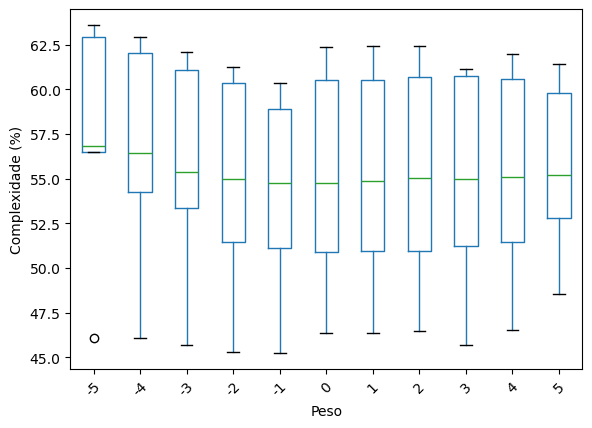

In [99]:
plt.figure(figsize=(10, 6))
df.boxplot(column='complexity', by='weight', grid=False, vert=True)
plt.title('')
plt.suptitle('')
plt.xlabel('Peso')
plt.ylabel('Complexidade (%)')
plt.xticks(rotation=45)
plt.savefig('complexity_by_weight.png', dpi=300)
plt.show()

In [100]:
df_stats = df.groupby('weight')['complexity'].agg(['mean', 'std']).reset_index()
print(df_stats)

'''
mean = média
std = desvio padrão
'''

    weight    mean       std
0       -5  57.192  7.042093
1       -4  56.358  6.825666
2       -3  55.514  6.623140
3       -2  54.662  6.600858
4       -1  54.074  6.118323
5        0  54.964  6.644669
6        1  55.030  6.649989
7        2  55.120  6.653315
8        3  54.756  6.545795
9        4  55.124  6.413067
10       5  55.544  5.234093


'\nmean = média\nstd = desvio padrão\n'

In [109]:
#diff = complexity_weight_0 - complexity_weight_x p/ seed

diff_comp = []

df_t = df.sort_values(by=['weight', 'seed'])
df_0 = df[['seed', 'weight', 'complexity']]
df_0 = df_0[df_0['weight'] == 0]

for index, row in df_t.iterrows():
    seed = row['seed']
    comp = row['complexity']
    
    if seed in df_0['seed'].values:
        complexity_value = df_0.loc[df_0['seed'] == seed, 'complexity'].values[0]
        diff_comp.append(comp - complexity_value)

df_t['diff'] = diff_comp

print(df_t.head())
print(df_0.head())
#diffs = df.groupby('seed')['diff'].agg(['mean', 'std']).reset_index()
#print(df_stats)

'''
mean = média
std = desvio padrão
'''

                                                path  weight  complexity  \
2  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       62.96   
1  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       63.58   
3  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.51   
4  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       46.07   
0  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.84   

        seed  diff  
2  235711120  2.44  
1  235711121  1.23  
3  235711122  5.64  
4  235711123 -0.27  
0  235711124  2.10  
         seed  weight  complexity
25  235711124       0       54.74
26  235711120       0       60.52
27  235711121       0       62.35
28  235711122       0       50.87
29  235711123       0       46.34


'\nmean = média\nstd = desvio padrão\n'

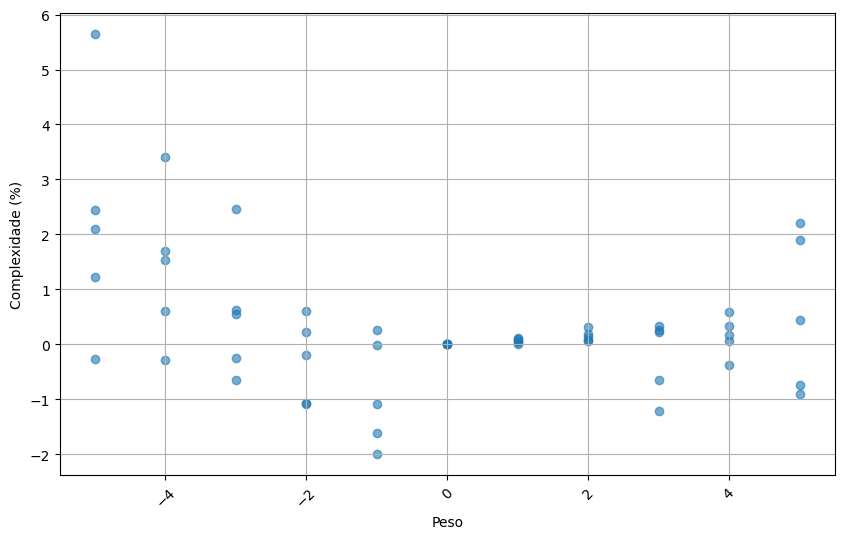

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(df_t['weight'], df_t['diff'], alpha=0.6)
plt.title('')
plt.xlabel('Peso')
plt.ylabel('Complexidade (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('complexity_by_weight_scatter.png', dpi=300)
plt.show()